# Lecture 05

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# sns.set_style('whitegrid')
sns.set_palette('tab10')

## Tree Model

### Decision Tree basics

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris_df = iris['frame']
display(iris_df.info(), iris_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


![](https://www.researchgate.net/profile/Wolfgang-Engelmann/publication/265877256/figure/fig3/AS:669555605114885@1536645904238/Flower-of-a-plant-with-peduncle-a-calyx-consisting-of-sepals-petals-stamen-and-in.png)

<AxesSubplot:xlabel='target', ylabel='count'>

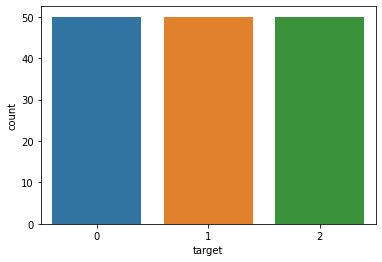

In [4]:
sns.countplot(data=iris_df, x='target', palette='tab10')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

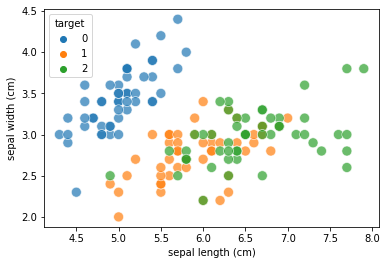

In [5]:
sns.scatterplot(
    data=iris_df, 
    x='sepal length (cm)', 
    y='sepal width (cm)', 
    hue='target', 
    s=100, 
    alpha=0.7, 
    palette='tab10'
)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

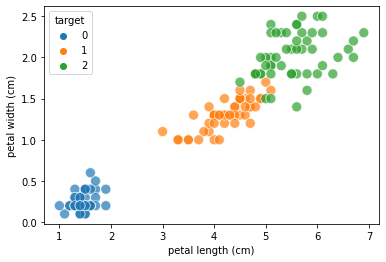

In [7]:
sns.scatterplot(
    data=iris_df, 
    x='petal length (cm)', 
    y='petal width (cm)', 
    hue='target', 
    s=100, 
    alpha=0.7, 
    palette='tab10'
)

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [9]:
from sklearn.model_selection import train_test_split

In [18]:
X, y = iris_df[['sepal length (cm)', 'petal length (cm)']], iris_df['target']
x_train, x_test, y_train, y_test=train_test_split(
    X,
    y, 
    test_size=0.2, 
    random_state =3110,
    stratify=y #chia deu theo phan phoi cua y, can bang giua cac nhan
)

In [31]:
tree = DecisionTreeClassifier(
    max_depth=5, # gioi han so tang cua cay
    max_features=2 # gioi han so bien cua mo hinh
)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [20]:
y_test.value_counts()

2    10
1    10
0    10
Name: target, dtype: int64

In [24]:
y_pred = tree.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  100.0


In [25]:
display(
    metrics.f1_score(y_test, y_pred, average='weighted'),
    metrics.precision_score(y_test, y_pred, average='weighted'),
    metrics.recall_score(y_test, y_pred, average='weighted')
)

1.0

1.0

1.0

In [26]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

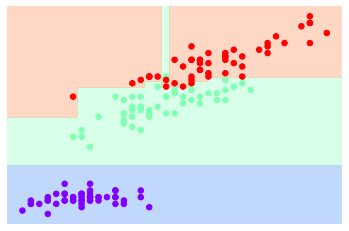

In [27]:
visualize_classifier(tree, X, y)

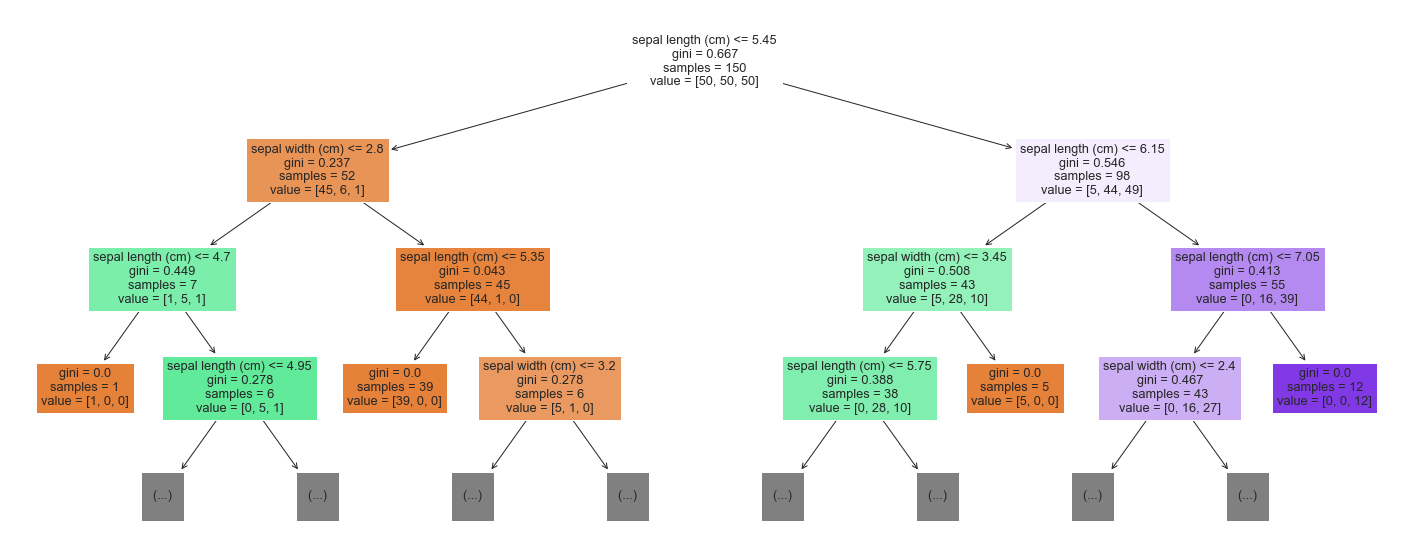

In [72]:
plt.figure(figsize=(25, 10))
_ = plot_tree(tree, feature_names=iris_df.columns, max_depth=3, filled=True)

In [29]:
tree.feature_importances_

array([0.07796894, 0.92203106])

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
forest = RandomForestClassifier(
    # Nhan cac tham so giong decision tree
    # Max_features 
    max_features = 2,
    # Max_depth
    max_depth =3, # so luong tang
    #n_estimator = so luong cay mac dinh 100
    n_estimators = 100,
    #random_state kiem soat yeu to ngau nhien cua thuat toan
    random_state = 1000
)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, max_features=2, random_state=1000)

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
forest = RandomForestClassifier()

forest.fit(X, y)


RandomForestClassifier()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler 

## dung Logistic Regression ap dung binary 2 nhan du doan

In [49]:
X

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [54]:
X = iris_df.drop(columns='target')
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [38]:
print(len(forest.estimators_))
forest.estimators_[:5]

100


[DecisionTreeClassifier(max_depth=3, max_features=2, random_state=659662259),
 DecisionTreeClassifier(max_depth=3, max_features=2, random_state=882709079),
 DecisionTreeClassifier(max_depth=3, max_features=2, random_state=493951047),
 DecisionTreeClassifier(max_depth=3, max_features=2, random_state=474091200),
 DecisionTreeClassifier(max_depth=3, max_features=2, random_state=1933950203)]

<AxesSubplot:xlabel='target', ylabel='count'>

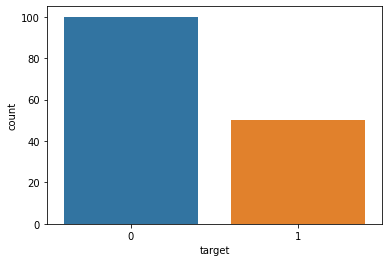

In [56]:
y_binary = y.eq(1).astype(int)
sns.countplot(x=y_binary)

In [57]:
logit_model=LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [77]:
y_pred = forest.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  92.66666666666666


In [58]:
y_pred = logit_model.predict(x_test)

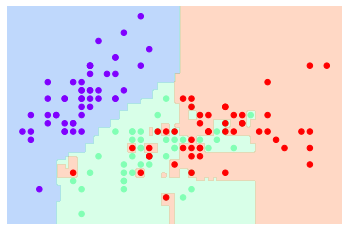

In [75]:
visualize_classifier(forest, X, y)

In [59]:
display(
    metrics.f1_score(y_test, y_pred, average='weighted'),
    metrics.precision_score(y_test, y_pred, average='weighted'),
    metrics.recall_score(y_test, y_pred, average='weighted')
)

0.5225225225225225

0.4393939393939394

0.6444444444444445

In [46]:
print( metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.78        30
           1       0.00      0.00      0.00        15

    accuracy                           0.64        45
   macro avg       0.33      0.48      0.39        45
weighted avg       0.44      0.64      0.52        45



In [68]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target_binary, Length: 150, dtype: int32

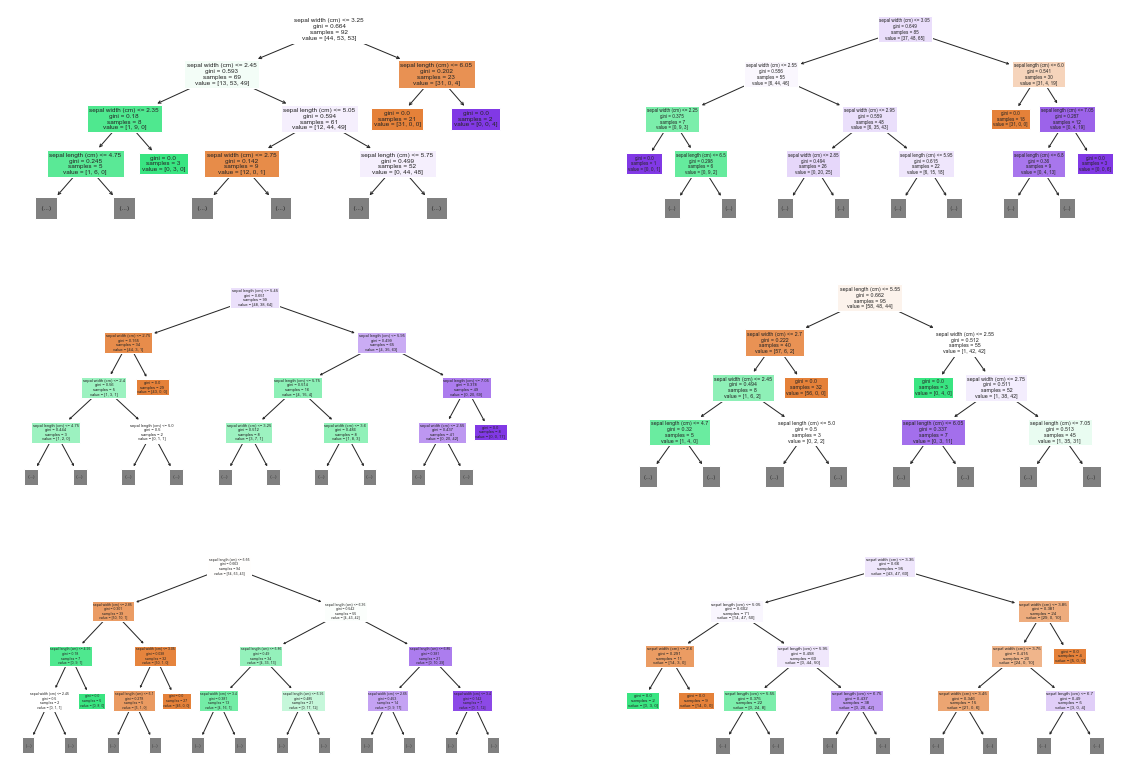

In [82]:
fig, axs = plt.subplots(3, 2, figsize=(20, 14))

for tree, ax in zip(forest.estimators_[:6], axs.ravel()):
    plot_tree(tree, feature_names=iris_df.columns, max_depth=3, filled=True, ax=ax)

## Support Vector Machines

<AxesSubplot:xlabel='target', ylabel='count'>

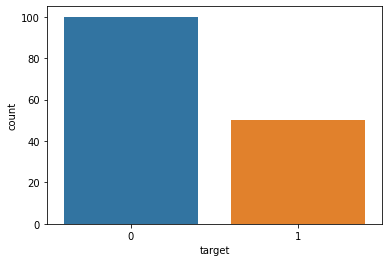

In [70]:
y_binary = iris_df['target'].gt(1).astype(int) #(y>0).astype(int)
# gt ~ greater than~ >
# ge ~ >=
# eq ~ ==
# ne ~ !=
# lt ~ <
# le ~ <=
# (+,-,*,/ ) nen su dung ham cua pandas
# (arr1 +1)/10 => arr1.add(1).div(10)
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

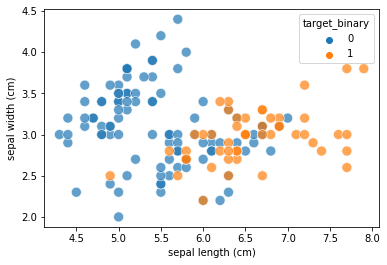

In [71]:
iris_df['target_binary'] = y_binary
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')

In [72]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target_binary']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X,y_binary, test_size=0.3,stratify=y_binary, random_state=30)

In [74]:
from sklearn.svm import SVC # Support Vector Classifier

svc = SVC(kernel='linear') # C = 1.0
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [75]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  80.0


In [131]:
# Decision Tree va Random Forest cho ket qua bao nhieu?

In [76]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolor='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

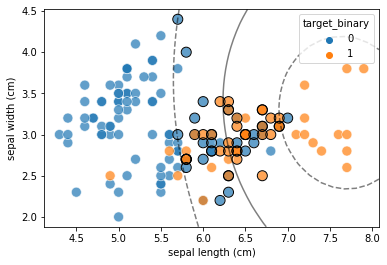

In [84]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [78]:
svc.decision_function

<bound method BaseSVC.decision_function of SVC(kernel='linear')>

In [82]:
svc = SVC(kernel='rbf') # C = 1.0
svc.fit(x_train, y_train)

SVC()

In [79]:
svc.support_vectors_

array([[6.3, 3.3],
       [5.9, 3.2],
       [6. , 2.9],
       [6.1, 2.8],
       [6.7, 3. ],
       [6. , 3.4],
       [6.7, 3.1],
       [6.1, 3. ],
       [6.2, 2.2],
       [6.6, 3. ],
       [6.3, 2.5],
       [6.1, 2.8],
       [6.5, 2.8],
       [5.8, 4. ],
       [6.1, 2.9],
       [6.3, 2.3],
       [7. , 3.2],
       [5.8, 2.7],
       [5.8, 2.7],
       [6. , 2.7],
       [6.4, 2.9],
       [6.6, 2.9],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.7, 4.4],
       [5.9, 3. ],
       [6.1, 3. ],
       [6.3, 2.8],
       [6.2, 2.8],
       [6.4, 2.7],
       [6.5, 3. ],
       [6.4, 2.8],
       [6.8, 3.2],
       [6.7, 3.3],
       [6.5, 3. ],
       [6.5, 3. ],
       [6.4, 3.1],
       [5.8, 2.7],
       [6.3, 2.9],
       [6.3, 2.5],
       [6.4, 2.8],
       [6.3, 3.3],
       [6.8, 3. ],
       [6. , 3. ],
       [6.7, 3.1],
       [6.7, 2.5],
       [6.2, 3.4],
       [5.8, 2.7],
       [6.7, 3.3],
       [6.3, 3.4]])

In [83]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  80.0


### Beyond linear boundaries: Kernel SVM

<AxesSubplot:xlabel='target_binary', ylabel='count'>

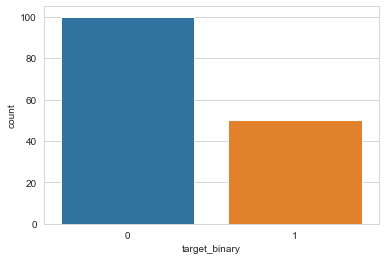

In [183]:
y_binary = y.gt(0).astype(int)
sns.countplot(x=y_binary)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

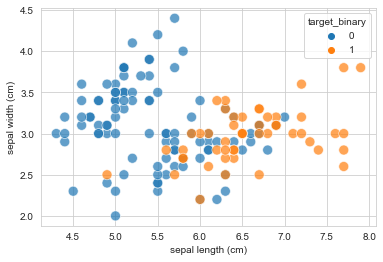

In [184]:
iris_df['target_binary'] = y_binary
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')

In [186]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target_binary']

In [187]:
svc = SVC(kernel='linear') # C = 1.0
svc.fit(X, y)

SVC(kernel='linear')

In [188]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  82.0


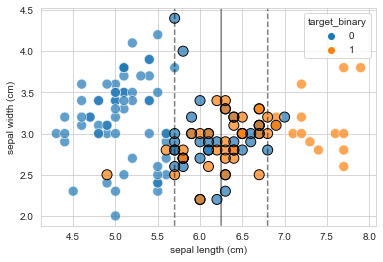

In [190]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [223]:
svc = SVC(kernel='rbf') # C = 1.0
svc.fit(X, y)

SVC()

In [224]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  82.66666666666667


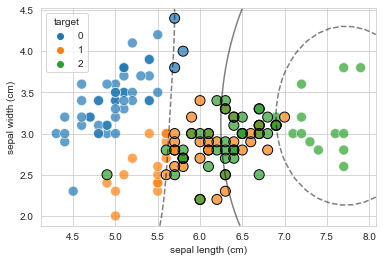

In [225]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

### Tuning the SVM: Softening Margins

In [226]:
svc = SVC(kernel='rbf', C=100) # C = 100.0
svc.fit(X, y)

SVC(C=100)

In [227]:
y_pred = svc.predict(X)
print('Accuracy score: ', metrics.accuracy_score(y, y_pred)*100)

Accuracy score:  83.33333333333334


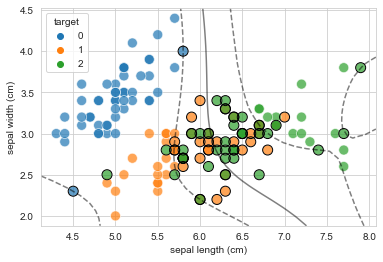

In [229]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

## Regularization Linear Model

## Model Validation & Cross Validation

In [232]:
from sklearn.model_selection import train_test_split, KFold

In [234]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
tree = DecisionTree()